In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('aaup.xlsx', sheet_name='Sheet1', header=0, index_col=None)
df

,FICE,College Name,State,Type,Avgsal_fullp,Avgsal_asp,Avgsal_assp,Avgsal_allra,AvgCom_fp,AvgCom_fp.1,AvgCom_fp.2,AvgCom_fp.3,No.of fp,No.of asp,No.of assp,No.of Instr,No.of Fa(allranks),Unnamed: 17
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32,"1061,Alaska Pacific University,AK,IIB,454,382,..."
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404,"1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,50..."
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70,"1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,..."
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392,"11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414..."
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262,"1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,502,419,369,431,54,43,29,11,137,"3825,West Virginia Inst. of Tech.,WV,IIB,408,3..."
1157,3827,West Virginia University,WV,I,535,431,361,439,642,521,438,529,335,237,272,22,895,"3827,West Virginia University,WV,I,535,431,361..."
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,572,494,434,495,25,22,24,3,74,"3830,West Virginia Wesleyan Coll.,WV,IIB,441,3..."
1159,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,486,416,348,381,8,20,25,12,65,"3831,Wheeling Jesuit College,WV,IIB,403,348,28..."


Q-1 **What is the probability that a randomly selected institution from this dataset has an average salary for full professors above $70,000?**


The probability that a randomly selected institution from this dataset has an average salary for full professors above $70,000:
0.07838070628768304


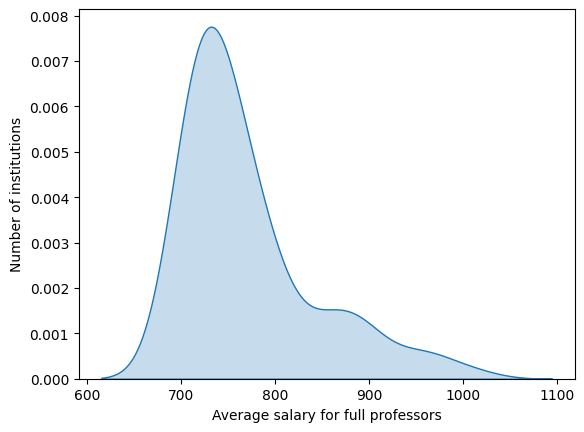

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('aaup.xlsx', sheet_name='Sheet1', header=0, index_col=None)
df["Avgsal_fullp"] = pd.to_numeric(df["Avgsal_fullp"], errors="coerce")
dfnew = df[df["Avgsal_fullp"] > 700]

# Count number of True in the series
num_institutes_above_70k_avgsal = len(dfnew.index)
print(f"The probability that a randomly selected institution from this dataset has an average salary for full professors above $70,000:\n{num_institutes_above_70k_avgsal/1161}")

# Create a histogram of the average full professor salaries
sns.kdeplot(dfnew["Avgsal_fullp"], fill = True)
#plt.axvline(x=700, color='r', label='Salary = $70,000')
plt.xlabel('Average salary for full professors')
plt.ylabel('Number of institutions')
plt.show()

Q-2 **Distribution of Average salary of all ranks and mark mean and variance in graph.**

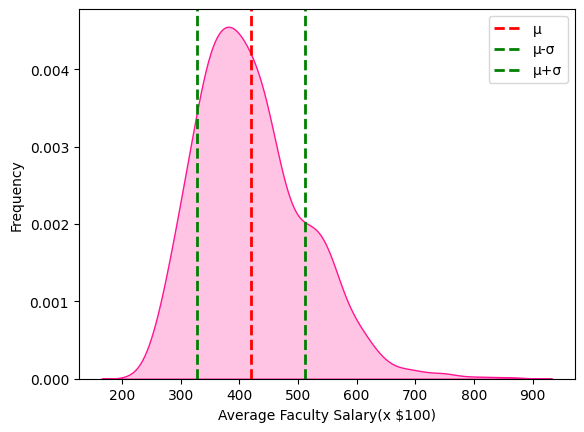

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["Avgsal_allra"]!=0]

# Calculate mean and variance of average faculty salaries
mean_sal = df["Avgsal_allra"].mean()
var_sal = df["Avgsal_allra"].var()

# Plot histogram of average faculty salaries
sns.kdeplot(df["Avgsal_allra"], fill = True, color='deeppink')

# Add vertical lines for mean and variance
plt.axvline(mean_sal, color='r', linestyle='dashed', linewidth=2,label='μ')
plt.axvline(mean_sal - var_sal**0.5, color='g', linestyle='dashed', linewidth=2,label="μ-σ")
plt.axvline(mean_sal + var_sal**0.5, color='g', linestyle='dashed', linewidth=2,label="μ+σ")

# Set x and y axis labels
plt.xlabel("Average Faculty Salary(x $100)")
plt.ylabel("Frequency")
plt.legend()
# Show the plot
plt.show()

Q-3 **Distribution of no of colleges on the basis of state type**

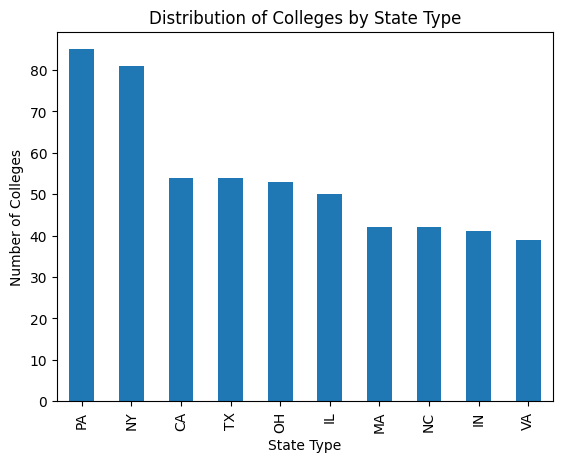

In [ ]:

state_type_count = df.groupby('State')['College Name'].count()
top_states = state_type_count.nlargest(10)
# Plot the distribution as a bar chart
top_states.plot(kind='bar')
plt.title('Distribution of Colleges by State Type')
plt.xlabel('State Type')
plt.ylabel('Number of Colleges')
plt.show()

**Q**-4 **How does no.of instructors vary as type of colleges ?**

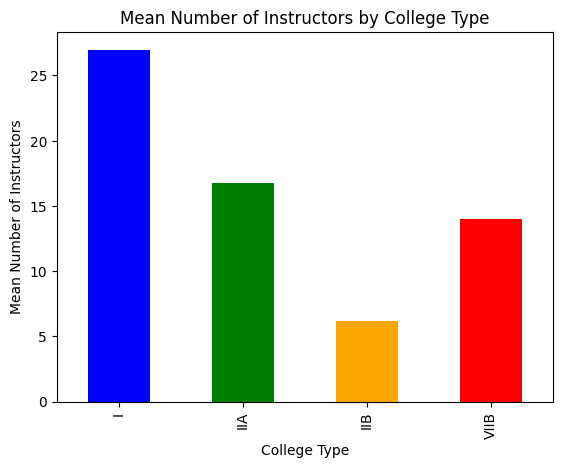

In [ ]:
# Group the DataFrame by college type and calculate the mean number of instructors
colors = ['blue', 'green', 'orange', 'red']
instructors_by_type = df.groupby('Type')['No.of Instr'].mean()

# Create a bar plot of the mean number of instructors by college type
instructors_by_type.plot(kind='bar',color=colors)

# Set the plot title and axis labels
plt.title('Mean Number of Instructors by College Type')
plt.xlabel('College Type')
plt.ylabel('Mean Number of Instructors')

# Display the plot
plt.show()

Q-5 **How Can I define cost of living in the area based compensation ?**

<ipython-input-46-234790bfaa2f>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="State",y="AvgCom_fp.3",data=comp,palette=colors)
<ipython-input-46-234790bfaa2f>:4: UserWarning: 
The palette list has fewer values (4) than needed (52) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x="State",y="AvgCom_fp.3",data=comp,palette=colors)


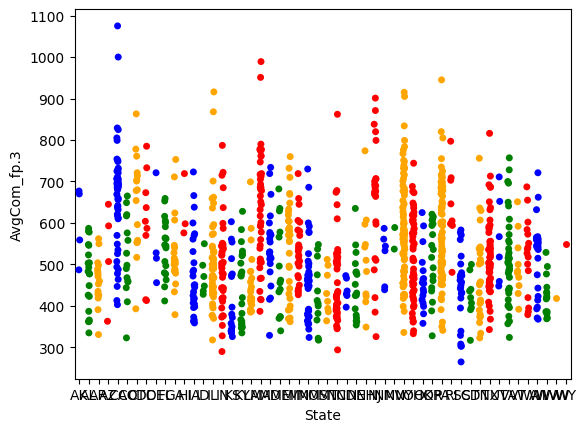

In [ ]:
comp=df[["State","AvgCom_fp.3"]]
colors = ['blue', 'green', 'orange', 'red']
s=(comp.groupby('State')).mean()
sns.stripplot(x="State",y="AvgCom_fp.3",data=comp,palette=colors)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('usnews.xlsx', sheet_name='Sheet1', header=0, index_col=None)
df

,FICE,College name,State,Public/Private,Avg_Math_SAT,Avg_verb_SAT,Avg_comb_SAT,Avg_ACT,First_quartile_M,Sec_quartile_M,...,Board_costs,Add_fees,Est_bookcosts,Est_personal,Faculty_PhD,Faculty_Terminal,St/fac ratio,alumini who donate,exp per stud,Graduation rate
0,1061,Alaska Pacific University,AK,2,490,482,972,20,440,530,...,2500,130,800,1500,76,72,11.9,2,10922,15
1,1063,University of Alaska at Fairbanks,AK,1,499,462,961,22,*,*,...,1790,155,650,2304,67,*,10,8,11935,*
2,1065,University of Alaska Southeast,AK,1,*,*,*,*,*,*,...,2250,34,500,1162,39,51,9.5,*,9584,39
3,11462,University of Alaska at Anchorage,AK,1,459,422,881,20,*,*,...,2520,114,580,1260,48,*,13.7,6,8046,*
4,1002,Alabama Agri. & Mech. Univ.,AL,1,*,*,*,17,*,*,...,1442,155,500,850,53,53,14.3,*,7043,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1,*,*,*,18,*,*,...,1700,50,750,750,38,38,19.2,4,3839,*
1298,3827,West Virginia University,WV,1,507,439,946,22,450,560,...,2026,*,*,*,83,86,13.4,*,8318,57
1299,3830,West Virginia Wesleyan College,WV,2,489,439,928,23,420,560,...,2025,*,450,1100,58,81,16.4,42,8080,67
1300,3831,Wheeling Jesuit College,WV,2,479,433,912,22,410,520,...,2445,*,600,600,66,71,14.1,27,7494,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FICE                1302 non-null   int64 
 1   College name        1302 non-null   object
 2   State               1302 non-null   object
 3   Public/Private      1302 non-null   int64 
 4   Avg_Math_SAT        1302 non-null   object
 5   Avg_verb_SAT        1302 non-null   object
 6   Avg_comb_SAT        1302 non-null   object
 7   Avg_ACT             1302 non-null   object
 8   First_quartile_M    1302 non-null   object
 9   Sec_quartile_M      1302 non-null   object
 10  First_quartile_V    1302 non-null   object
 11  Sec_quartile_V      1302 non-null   object
 12  First_quartile_ACT  1302 non-null   object
 13  Sec_quartile_ACT    1302 non-null   object
 14  No.ofapp(rec)       1302 non-null   object
 15  No.ofapp(acc)       1302 non-null   object
 16  No.ofnewst(enro)    1302

Q-6 **How  does student/faculty ratio affect graduation rate ?**

<ipython-input-50-e58ae309b5a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("*", np.nan, inplace=True)
<ipython-input-50-e58ae309b5a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


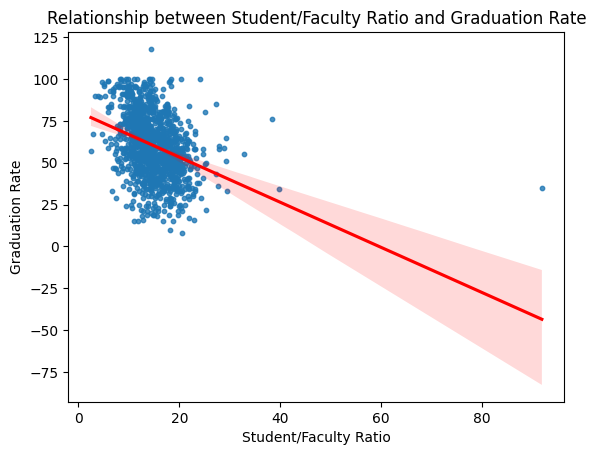

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Select the relevant columns
data = df[['St/fac ratio', 'Graduation rate']]


# Replace the missing values with NaN
data.replace("*", np.nan, inplace=True)

# Drop any rows with NaN values
data.dropna(inplace=True)
# Remove rows with missing values
data = data.dropna()

# Plot the data
sns.regplot(x='St/fac ratio', y='Graduation rate', data=data, scatter_kws={'s':10},line_kws={'color':'red'})
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.title('Relationship between Student/Faculty Ratio and Graduation Rate')
plt.show()

Q-7 **Is there a correlation between the mean MAT score and the mean SAT Math score among the colleges in the dataset?**

<ipython-input-52-dc39542e485e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("*", np.nan, inplace=True)
<ipython-input-52-dc39542e485e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


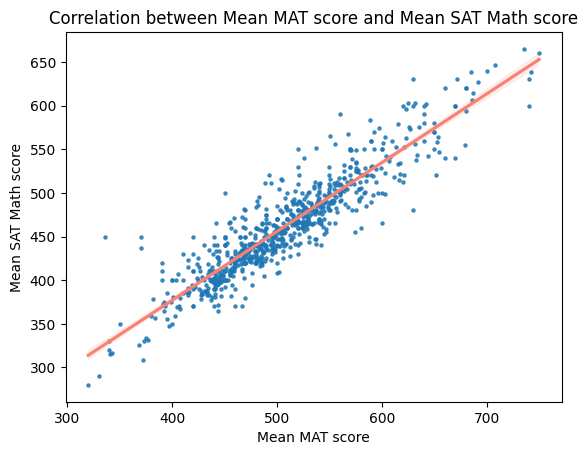

The correlation coefficient between Mean MAT score and Mean SAT Math score is: 0.9171107083279801


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the relevant columns
data = df[['Avg_Math_SAT', 'Avg_verb_SAT']]

# Replace the missing values with NaN
data.replace("*", np.nan, inplace=True)

# Drop any rows with NaN values
data.dropna(inplace=True)
# Remove rows with missing values
data = data.dropna()
# Calculate the correlation coefficient
corr_coef = data['Avg_Math_SAT'].corr(data['Avg_verb_SAT'])

# Plot the data
sns.regplot(x='Avg_Math_SAT', y='Avg_verb_SAT', data=data, scatter_kws={'s':5},line_kws={'color':'salmon'})
plt.xlabel('Mean MAT score')
plt.ylabel('Mean SAT Math score')
plt.title('Correlation between Mean MAT score and Mean SAT Math score')
plt.show()

print("The correlation coefficient between Mean MAT score and Mean SAT Math score is:", corr_coef)



Q-8 **How can we determine quality of education of all colleges using distribution of student-faculty ratio ?**

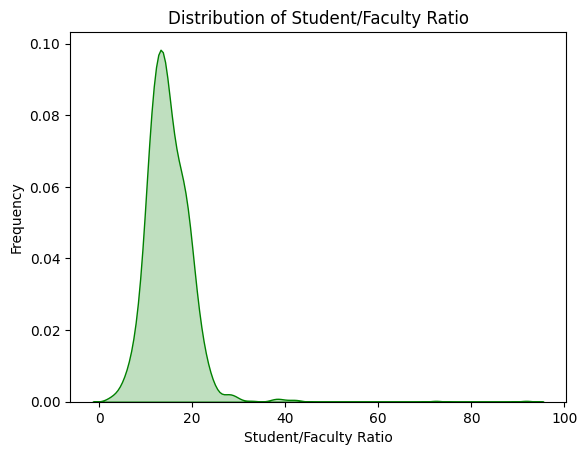

In [ ]:
# Select the student-faculty ratio column
data = df['St/fac ratio']

# Replace the missing values with NaN
data.replace("*", np.nan, inplace=True)

# Drop any rows with NaN values
data.dropna(inplace=True)
# Remove rows with missing values
data = data.dropna()


sns.kdeplot(data,fill=True,color="green")
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Student/Faculty Ratio')
plt.show()

Q-9 ***How can we determine campus life of all colleges using distribution of room and board costs ?***

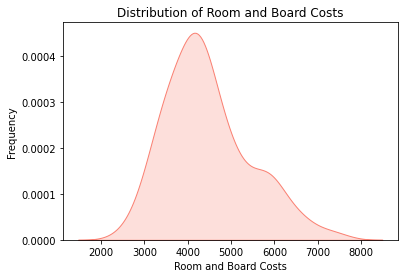

In [ ]:
# Select the room and board cost column
data = df['Room_board_cos']

# Remove rows with missing values
data = data.dropna()

# Plot the histogram
sns.kdeplot(data, fill = True, color='salmon')
plt.xlabel('Room and Board Costs')
plt.ylabel('Frequency')
plt.title('Distribution of Room and Board Costs')
plt.show()